El clasificador Naive Bayes se basa en encontrar funciones que describan la probabilidad de pertenecer a una clase de características determinadas:

$$P(Supervivencia|f_1,...,f_n)$$


Aplicamos la ley de Bayes para simplificar el cálculo:

$$P(Supervivencia|f_1,...,f_n)=P(f_1,...,f_n|Supervivencia)\times P(Supervivencia) / P(f_1,...,f_n)$$


La probabilidad $P(Supervivencia)$ es fácil de calcular y el denominador en realidad no se necesita porque no cambia.

Todo se reduce a encontrar $P(f_1,...,f_n|Supervivencia)$.

Si aplicamos la fórmula para la probabilidad condicional:

$$P(f_1,...,f_n|Supervivencia)=P(f_1|Supervivencia)\times P(f_2|Supervivencia,f_1)\times ... \times P(f_n|Supervivencia,f_1,...,f_{n-1})$$

Pero si las variables son independientes se simplifica a:

$$P(f_1,...,f_n|Supervivencia)=\prod_{i = 1}^{n} P(f_i|Supervivencia)$$

Finalmente, para clasificar un nuevo vector de características, tendríamos que elegir el valor de Supervivencia (0 o 1) para el cual $P(f_1,...,f_n|Supervivencia)$ se maximiza:

$$classifier(f_1,...,f_n) = argmax_{s \in \{0,1 \} } P(f_1,...,f_n | s)$$

Quedaría por decidir cómo hallar las probabilidades $P(f_i,Supervivencia)$. En el paquete de Sklearn vienen disponibles tres distribuciones que se pueden asumir para modelarla:
1. Gaussiana: Asume que las características son variables continuas y tienen distribución Normal.
2. Multinomial: Variables discretas.
3. Bernoulli: Variables binarias.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Importing dataset
data = pd.read_csv("train.csv")

# Convert categorical variable to numeric
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0,
                                  np.where(data["Embarked"]=="C",1,
                                           np.where(data["Embarked"]=="Q",2,3)
                                          )
                                 )
# Cleaning dataset of NaN
data=data[[
    "Survived",
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]].dropna(axis=0, how='any')

# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.2,random_state=1)


In [58]:
print('Tamaño train set', X_train.shape[0])
print('Tamaño test set', X_test.shape[0])

Tamaño train set 571
Tamaño test set 143


In [59]:
# Instantiate the classifier
gnb = GaussianNB()
used_features =[
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]

# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["Survived"]
)
y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 143 points : 31, performance 78.32%


# Sklearn Gaussian Naive Bayes classifier

In [60]:
mean_survival=np.mean(X_train["Survived"])
mean_not_survival=1-mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

Survival prob = 40.81%, Not survival prob = 59.19%


In [64]:
mean_fare_survived = np.mean(X_train[X_train["Survived"]==1]["Fare"])
std_fare_survived = np.std(X_train[X_train["Survived"]==1]["Fare"])

mean_fare_not_survived = np.mean(X_train[X_train["Survived"]==0]["Fare"])
std_fare_not_survived = np.std(X_train[X_train["Survived"]==0]["Fare"])

print("mean_fare_survived = {:03.2f}".format(mean_fare_survived))
print("std_fare_survived = {:03.2f}".format(std_fare_survived))

print("mean_fare_not_survived = {:03.2f}".format(mean_fare_not_survived))
print("std_fare_not_survived = {:03.2f}".format(std_fare_not_survived))


mean_fare_survived = 51.72
std_fare_survived = 71.69
mean_fare_not_survived = 23.02
std_fare_not_survived = 30.79


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


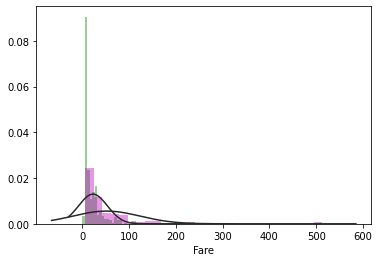

In [81]:
import seaborn as sns
from scipy.stats import norm
# Normal Fit
sns.distplot(X_train[X_train["Survived"]==0]["Fare"], fit=norm,kde=False,color='g');
sns.distplot(X_train[X_train["Survived"]==1]["Fare"], fit=norm,kde=False,color='m');

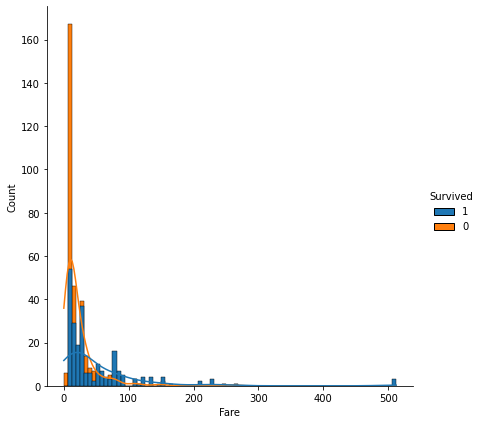

In [86]:
#KDE estimation
sns.displot(X_train, x="Fare", hue="Survived",kde=True,alpha=1,height=6,hue_order=[1,0]);

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
used_features =["Fare"]
y_pred = gnb.fit(X_train[used_features].values, X_train["Survived"]).predict(X_test[used_features])
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))
print("Std Fare not_survived {:05.2f}".format(np.sqrt(gnb.sigma_)[0][0]))
print("Std Fare survived: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("Mean Fare not_survived {:05.2f}".format(gnb.theta_[0][0]))
print("Mean Fare survived: {:05.2f}".format(gnb.theta_[1][0]))


Number of mislabeled points out of a total 143 points : 50, performance 65.03%
Std Fare not_survived 30.79
Std Fare survived: 71.69
Mean Fare not_survived 23.02
Mean Fare survived: 51.72
